In [1]:
import pandas as pd
import numpy as np
import os, fnmatch, re, cv2, random,sys, pickle
import torch
#import imgaug as ia
#import imageio
%matplotlib inline  
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from torch.utils import data
from torchvision import transforms
import torch.nn as nn
sys.path.append('..')

root_locEm = "../"
root_datasets = "../../../../datasets/"
root_ImageNetVidsDevkit = root_datasets+"ImageNetVids/imageNetVidsDevkit.data/"
root_ImageNetVids = root_datasets+"ImageNetVids/imageNetVids.data/"
path_to_frames= root_ImageNetVids+"Data/VID/train/"
path_to_val_frames= root_ImageNetVids+"Data/VID/val/"
path_to_annotations= root_ImageNetVids+"Annotations/VID/train/"

network_dim = 448
map_vid = pd.read_pickle("../data/map_vid.pkl")

In [2]:
uid_thing = pd.read_pickle('../data/unique_keys.pkl')
#00007026 000014
uid_thing[uid_thing.snip_id=='00007026']
#uid_thing.iloc[0]

,cat_code,snip_id,trackid
371,1,00007026,0
372,1,00007026,1
373,1,00007026,2
374,1,00007026,3
375,1,00007026,4
376,1,00007026,5
377,1,00007026,6
378,1,00007026,7
379,1,00007026,8


In [3]:
S=7
B=2
X=5
C=30
beta=64
gamma=1
image_size = 448

In [4]:
from genINV_Locem_Eval_v2 import ImageNetVID
from torch.utils.data import DataLoader

In [5]:
def collate_fn(data):

    '''print("TYPE DATA COLLATE",type(data))
    print("LEN DATA COLLATE",len(data))
    print("type data[0]",type(data[0][0]))
    print("type data[1]",type(data[0][1]))
    print("type data[2]",type(data[0][2]))'''

    #sys.exit(0)
    '''images = torch.tensor(np.transpose(data[0][0],(2,0,1)))
    bboxes = torch.tensor(data[0][1])'''

    n = len(data[0])
    out = []

    for i in range(n):
        out.append(data[0][i])

    return out

In [6]:
train_dataset = "../data/metadata_imgnet_vid_train_n2.pkl"
val_dataset = "../data/metadata_imgnet_vid_val_n2.pkl"
root_datasets = '/mnt/data1/shravank/datasets/'
#gen_train = ImageNetVID(root_datasets,train_dataset,split='train')
#gen_val = ImageNetVID(root_datasets,val_dataset,split='val')

In [7]:
gen_train = ImageNetVID(root_datasets,train_dataset,split='train',image_size=image_size,S=S,B=B,C=C,X=X)
gen_val = ImageNetVID(root_datasets,val_dataset,split='val',image_size=image_size,S=S,B=B,C=C,X=X,crop=True)


train_loader = DataLoader(gen_train,batch_size=1,shuffle=False,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=1,shuffle=False,collate_fn=collate_fn)

USING v101 of generator
USING v101 of generator


In [21]:
gen_val.data_set[gen_val.data_set.snip_id=='00032003']

,cat_code,snip_id,folder,file,width,height,wnid,trackid,xmax,xmin,ymax,ymin
8,12,00032003,ILSVRC2015_val_00032003,000078,480,360,n02118333,0,296,64,329,5
9,12,00032003,ILSVRC2015_val_00032003,000193,480,360,n02118333,0,306,92,351,26
10,12,00032003,ILSVRC2015_val_00032003,000431,480,360,n02118333,1,478,282,237,51
11,12,00032003,ILSVRC2015_val_00032003,000624,480,360,n02118333,1,478,302,242,54


In [27]:
gen_val.all_data[(gen_val.all_data.snip_id=='00032003')&(gen_val.all_data.file=='000078')]

,cat_code,snip_id,folder,file,width,height,wnid,trackid,xmax,xmin,ymax,ymin
1331,12,00032003,ILSVRC2015_val_00032003,000078,480,360,n02118333,0,296,64,329,5
1332,12,00032003,ILSVRC2015_val_00032003,000078,480,360,n02118333,1,478,382,258,76


In [11]:
rd = "/mnt/data1/shravank/datasets/"+"ILSVRC2015/Data/VID/val/"

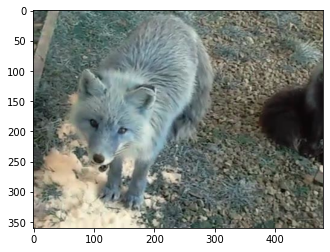

In [25]:
fd = 'ILSVRC2015_val_00032003'+'/'
fl = '000078'
img_t = cv2.imread(rd+fd+fl+'.JPEG')
target_boxes = [[64, 5, 296, 329], [382, 76, 478, 258]]
plt.imshow(img_t)

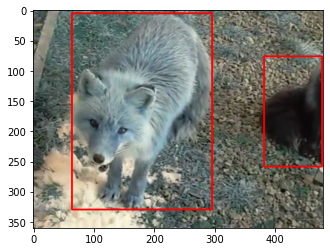

In [26]:
red = (255,0,0)
green = (0,255,0)
thickness = 2
for box in target_boxes:
    x1,y1,x2,y2 = box
    pt1 = (x1,y1)
    pt2 = (x2,y2)
    img_t = cv2.rectangle(img_t,pt1,pt2,red,thickness)
plt.imshow(img_t)

In [ ]:
!ls /mnt/data1/shravank/datasets/ILSVRC2015/Data/VID/val/ILSVRC2015_val_00042009/

In [ ]:
img,bb,cn = [],[],[]
filenames = {}
for i, (image,bbox,classname,filename, uids,class_ids,target_tensor) in enumerate(val_loader):
    #img = image
    #bb = bbox
    #cn = classname
    if filename not in filenames:
        filenames[filename]=1
    else:
        filenames[filename]+=1
        

In [ ]:
filenames

In [ ]:
plt.imshow(img)

In [ ]:
red = (255,0,0)
green = (0,255,0)
thickness = 2
x1,y1,x2,y2 = bbox[0]
pt1 = (x1,y1)
pt2 = (x2,y2)
img = cv2.rectangle(img,pt1,pt2,red,thickness)
plt.imshow(img)

In [ ]:
def collate_fn(data):
        
    images_list,target_list = [],[]
    batch_size = len(data)
    
    for batch in range(batch_size):
        images_list.append(data[batch][0])
        target_list.append(data[batch][1])
    
    images = torch.cat(images_list,dim=0)
    targets = torch.cat(target_list,dim=0)
    
    return images,targets

In [ ]:
train_loader = DataLoader(gen_train,batch_size=1,shuffle=True,collate_fn=collate_fn)
val_loader = DataLoader(gen_val,batch_size=1,shuffle=False,collate_fn=collate_fn)

In [ ]:
for i, (image,bbox,classname,filename,ids) in enumerate(val_loader):
    print('image',image.shape)
    print('bbox',len(bbox))
    print('classname',classname)
    print('filename',filename)

    print("TYPES")

    print('image',len(image))
    print('bbox',len(bbox))
    print('classname',len(classname))
    print('filename',len(filename))
    
    print(len(ids))
    break
    '''for b in range(len(bbox)):

                x1,y1,x2,y2 = bbox[b]
                targets_ev[(filename[b],classname[b])].append([x1,y1,x2,y2])'''

In [ ]:
def showTorchTensorImg(img):
    
    #assert img is a torch of size nchw
    return plt.imshow(img.permute(1,2,0).numpy())

In [ ]:
imgs,tgt = [],[]
for i,(images,target) in enumerate(train_loader):
    imgs = images
    tgt = target
    print('Images size',images.size())
    print('Target size',target.size())
    break

In [ ]:
S=7 
B=2
X=5
C=30
beta=64

In [ ]:
from torch.nn import functional as F

In [ ]:
a = torch.rand(2,3)
a

In [ ]:
F.normalize(a,p=2)

In [ ]:
l2 = F.normalize(a,p=2)
l2

In [ ]:
s = torch.sigmoid(a)
s

In [ ]:
from r50_locem import resnet50

In [ ]:
model = resnet50()

In [ ]:
model =resnet50(pretrained=True)

In [ ]:
o1 = model(images)

In [ ]:
o1.size()

In [ ]:
o1[0,0,0,40:]

In [ ]:
o1f = F.normalize(o1[:,:,:,40:],p=2)
o1f[0,0,0,40:]

In [ ]:
o1f.size()

In [ ]:
o1[0,0,0,40:].size()

In [ ]:
o1f[0,0,0,40:].size()

In [ ]:
print(model)

In [ ]:
r = nn.ReLU()

In [ ]:
k = torch.randint(low=-5,high=5,size=(1,4),dtype=torch.float)
k

In [ ]:
p = torch.randn((1,4))
p

In [ ]:
p = F.normalize(p,p=2)
p


In [ ]:
o = torch.zeros((1,4))
o

In [ ]:
F.cosine_similarity(p,p)

In [ ]:
import random

In [ ]:
random.random()

In [ ]:
from r50_locem import resnet101

In [ ]:
model =resnet101(pretrained=True)

In [ ]:
dt = pd.read_pickle('../../data/metadata_imgnet_vid_val_n2.pkl')

In [ ]:
dataset = pd.DataFrame(dt)
unique_ids = dataset.drop_duplicates(subset=['cat_code','snip_id','trackid'],keep='first')
unique_ids = unique_ids.reset_index(drop=True)
unique_ids = unique_ids.drop(labels=['folder','file','width','height','wnid','xmax','xmin','ymax','ymin'],axis=1)

In [ ]:
unique_ids

In [ ]:
ans = unique_ids[(unique_ids.cat_code==9) & (unique_ids.snip_id=='00102000') & (unique_ids.trackid==0)].index.to_numpy()
ans = int(ans)
ans

In [ ]:
s = unique_ids.loc[0]
s

In [ ]:
unique_ids[(unique_ids.cat_code==s.cat_code) & (unique_ids.snip_id==s.snip_id) & (unique_ids.cat_code==s.trackid)]